# CIFAR-10

Learning a classifier for the [CIFAR-10](http://www.cs.utoronto.ca/~kriz/cifar.html) dataset.

* [reference 1](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)

* [reference 2](https://keras.io/examples/cifar10_cnn/)

In [2]:
import sys
import os
import numpy as np
sys.path.append('/home/guillaume/cpp_work_space/cs-exercises/python/')
import machine_learning_utils.utils as ml_utils
import matplotlib.pyplot as plt
import tensorflow as tf

print("The Python version is %s.%s.%s" % sys.version_info[:3])
import machine_learning_models.cifar_10_models as models


The Python version is 3.6.8


In [3]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
tf.compat.v1.keras.backend.set_session(tf.Session(config=config))

In [4]:
def get_dataset(name='data_batch_1', folder='/home/guillaume/Data/cifar-10-python'):
    batch = ml_utils.load_data(os.path.join(folder, name))
    data = batch[b'data']
    labels = np.array(batch[b'labels'])
    R = data[:, :1024].reshape((-1, 32, 32))
    G = data[:, 1024:(2*1024)].reshape((-1, 32, 32))
    B = data[:, (2*1024):].reshape((-1, 32, 32))
    return np.stack((R, G, B), axis=3), labels

In [5]:
num_batches = 5
images_set = list()
labels_set = list()
for i in range(num_batches):
    print('Loading {}'.format(i+1))
    images, labels = get_dataset('data_batch_' + str(i+1))
    images_set.append(images)
    labels_set.append(labels)
images = np.concatenate(images_set)
labels = np.concatenate(labels_set)

test_images, test_labels = get_dataset('test_batch')

Loading 1
Loading 2
Loading 3
Loading 4
Loading 5


In [6]:
images = images.astype(np.float32)
images /= 255
print('{} MB'.format(images.nbytes/1e6))
test_images = test_images.astype(np.float32)
test_images /= 255

614.4 MB


### Prepare datasets

In [7]:
test_percentage = 0.2
train_data, train_label, test_data, test_label = ml_utils.split_test_train(test_percentage, images, labels)

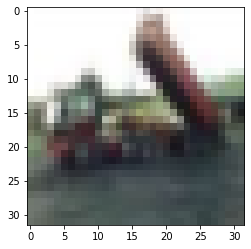

(32, 32, 3)


In [8]:
plt.figure()
plt.imshow(images[2, :, :, :])
plt.show()
print(images[2, :, :, :].shape)

In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_label))

batch_size = 128
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).repeat()
test_dataset  = test_dataset.shuffle(buffer_size=1000).batch(batch_size).repeat()

In [20]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=90,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True, 
    validation_split=0.2)
image_data_generator.fit(train_data)


In [21]:
# model = models.create_conv_net()
model = models.create_keras_example_1()
model.summary()

model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

In [22]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=6, monitor='val_loss', restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath='/home/guillaume/cpp_work_space/cs-exercises/statistics/tensorflow/checkpoints/cifar_10/', 
                                     monitor='val_loss', 
                                     save_weights_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs/model2/')
]



In [23]:
history = model.fit(train_dataset, epochs=1000, steps_per_epoch=2000, validation_steps=1000, callbacks=callbacks,
           validation_data=test_dataset)


E0805 21:08:51.129033 140132133308224 checkpoint_management.py:348] Couldn't match files for checkpoint /home/guillaume/cpp_work_space/cs-exercises/statistics/tensorflow/checkpoints/cifar_10/.


Epoch 1/1000
2000/2000 [==============================] - 33s 16ms/step - loss: 1.1148 - acc: 0.6021 - val_loss: 0.7597 - val_acc: 0.7344
Epoch 2/1000
2000/2000 [==============================] - 24s 12ms/step - loss: 0.6654 - acc: 0.7662 - val_loss: 0.6742 - val_acc: 0.7653
Epoch 3/1000
2000/2000 [==============================] - 23s 12ms/step - loss: 0.4964 - acc: 0.8225 - val_loss: 0.6489 - val_acc: 0.7841
Epoch 4/1000
2000/2000 [==============================] - 24s 12ms/step - loss: 0.3994 - acc: 0.8567 - val_loss: 0.6863 - val_acc: 0.7795
Epoch 5/1000
2000/2000 [==============================] - 24s 12ms/step - loss: 0.3359 - acc: 0.8797 - val_loss: 0.6881 - val_acc: 0.7885
Epoch 6/1000
2000/2000 [==============================] - 24s 12ms/step - loss: 0.2986 - acc: 0.8937 - val_loss: 0.6854 - val_acc: 0.7882
Epoch 7/1000
2000/2000 [==============================] - 24s 12ms/step - loss: 0.2739 - acc: 0.9033 - val_loss: 0.6799 - val_acc: 0.7992
Epoch 8/1000
2000/2000 [==========

In [ ]:
history = model.fit_generator(image_data_generator.flow(train_data, train_label, batch_size=batch_size),
                    epochs=1000, steps_per_epoch=2000, validation_data=(test_data, test_label), callbacks=callbacks)

In [18]:
model.metrics_names

loss, acc = model.evaluate(test_images, test_labels)
print('loss: {} acc: {}'.format(loss, acc))

10000/10000 [==============================] - 2s 189us/sample - loss: 0.7134 - acc: 0.7960
loss: 0.7134353098392486 acc: 0.7960000038146973
